Leveraging the dataframe generated in het03, we are going to look at the best summary statistics.
First with some plots, then with standard linear models, last with more flexible bayesian modeling.

In [1]:
%run ../scripts/notebook_settings_lean.py

Reading in metadata and stats

In [2]:
metadata = pd.read_csv("/home/eriks/primatediversity/people/erik/data/Primate_data_Erik - FROH.csv")
stats_df = pd.read_csv("../steps/het_dataframe_het03.txt")

Calculating ratios. x autosomes ratio both based on means and medians.

In [3]:
total_df = pd.merge(stats_df, metadata, on = "PDGP_ID")
total_df["x_a_ratio"] = total_df.x_het_mean/total_df.aut_het_mean
total_df["x_a_ratio_median"] = total_df.x_het_median/total_df.aut_het_median
total_df["FROH"] = total_df.FROH.astype(float)

Plotting relationship. I am using facetgrid to distinguish between the various geni.

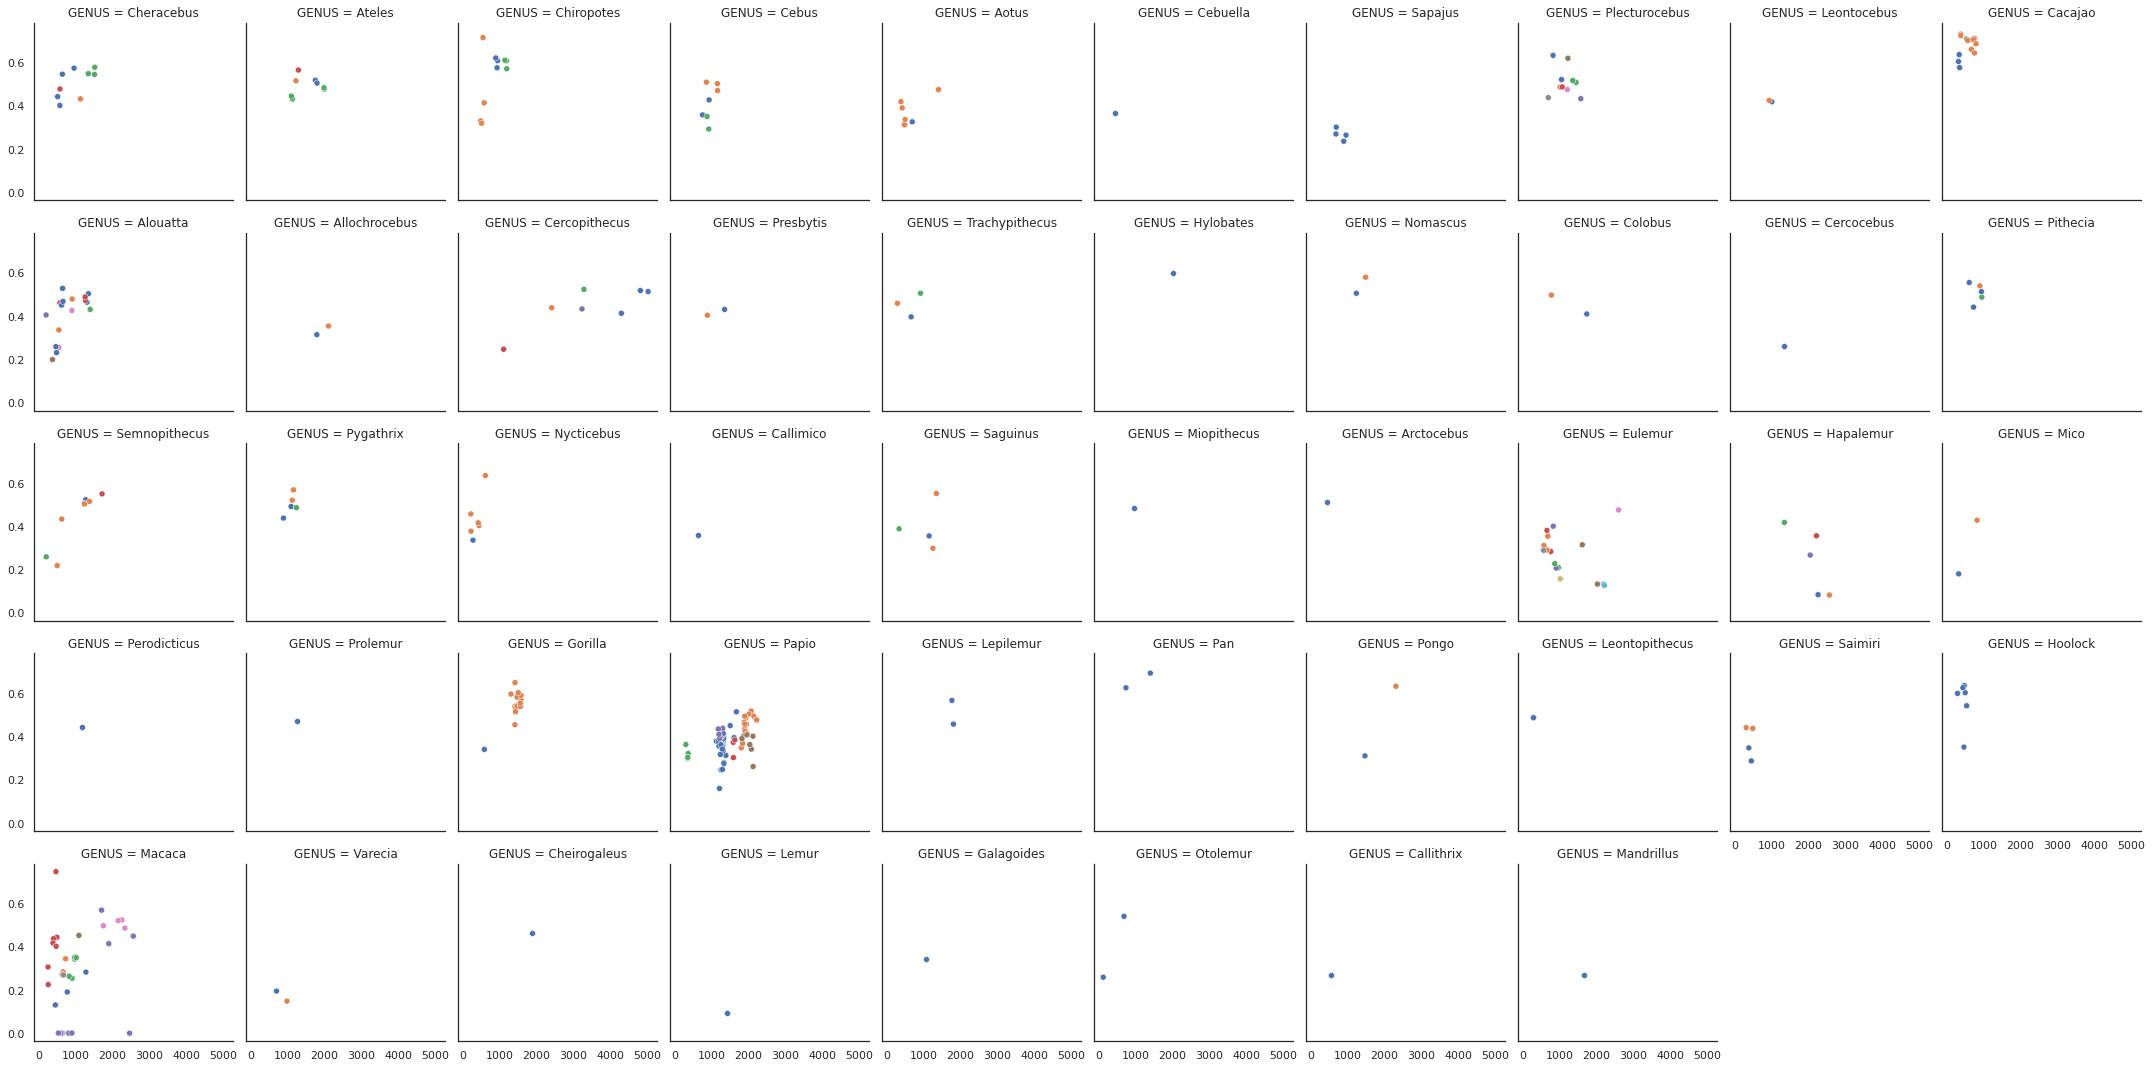

In [4]:
g = sns.FacetGrid(data=total_df, col="GENUS", col_wrap = 10)
g.map_dataframe(sns.scatterplot, x="aut_het_mean", y="x_a_ratio", hue="SPECIES")

Check on the very low ratios.
They seem to be males, as their heterozygosity on autosomes is drastically higher.

In [5]:
total_df.loc[total_df.x_a_ratio < 0.1]

,PDGP_ID,aut_het_std,x_het_std,aut_het_mean,x_het_mean,aut_het_median,x_het_median,aut_std,x_std,aut_mean,...,x_q0.2,x_q0.3,x_q0.5,x_q0.7,x_q0.9,GENUS,SPECIES,FROH,x_a_ratio,x_a_ratio_median
73,PD_0157,1015.234073,742.446647,2261.225672,190.896552,2279.0,21.0,3116.799826,2501.892835,9311.882999,...,7.213331,9.025831,11.938403,14.526192,18.523121,Hapalemur,gilberti,0.015360,0.084422,0.009215
74,PD_0158,1128.303050,827.486885,2568.170011,213.268966,2603.0,21.0,2998.396699,2673.176935,10811.292314,...,7.642931,9.485675,12.205245,14.971705,18.568102,Hapalemur,griseus,0.031569,0.083043,0.008068
244,PD_0620,726.948689,511.784417,1421.852707,132.958621,1371.0,9.0,1048.157941,725.774216,2108.367664,...,5.836402,7.536179,10.311479,13.387624,17.922869,Lemur,catta,0.002544,0.093511,0.006565
287,PD_0818,838.499151,7.257293,2468.050738,2.510345,2592.0,0.0,1128.862781,10.872189,3756.801212,...,774.395604,882.348901,1032.527473,1165.178571,1338.461538,Macaca,fascicularis,0.000541,0.001017,0.000000
288,PD_0826,1136.717142,2.383738,658.409842,0.805556,0.0,0.0,2193.387438,3.989491,1471.629373,...,0.000000,0.000000,0.000000,34.758621,3334.344828,Macaca,fascicularis,0.177229,0.001223,NaN
289,PD_0827,1066.996627,1.681206,635.883147,0.447552,0.0,0.0,1772.528536,4.133901,1172.427690,...,0.000000,0.000000,0.000000,102.334375,5643.584375,Macaca,fascicularis,0.171613,0.000704,NaN
290,PD_0828,1260.544593,6.745069,802.040276,1.436620,0.0,0.0,1813.232165,7.996556,1168.458765,...,0.000000,0.000000,0.000000,671.576471,2046.749020,Macaca,fascicularis,0.001692,0.001791,NaN
291,PD_0829,1324.127849,3.297469,860.778462,0.791045,0.0,0.0,1825.220492,4.295223,1198.760385,...,0.000000,0.000000,0.000000,1994.324528,3777.283019,Macaca,fascicularis,0.001759,0.000919,NaN
292,PD_0830,1281.018533,2.935825,825.448236,0.813433,0.0,0.0,1787.766782,4.953612,1163.943001,...,0.000000,0.000000,0.000000,1685.203670,3602.510092,Macaca,fascicularis,0.000000,0.000985,NaN
293,PD_0832,1328.601705,4.729965,905.655093,1.328358,0.0,0.0,1894.090932,10.056191,1304.820988,...,0.000000,0.000000,0.000000,1449.232584,2257.523596,Macaca,fascicularis,0.002436,0.001467,NaN


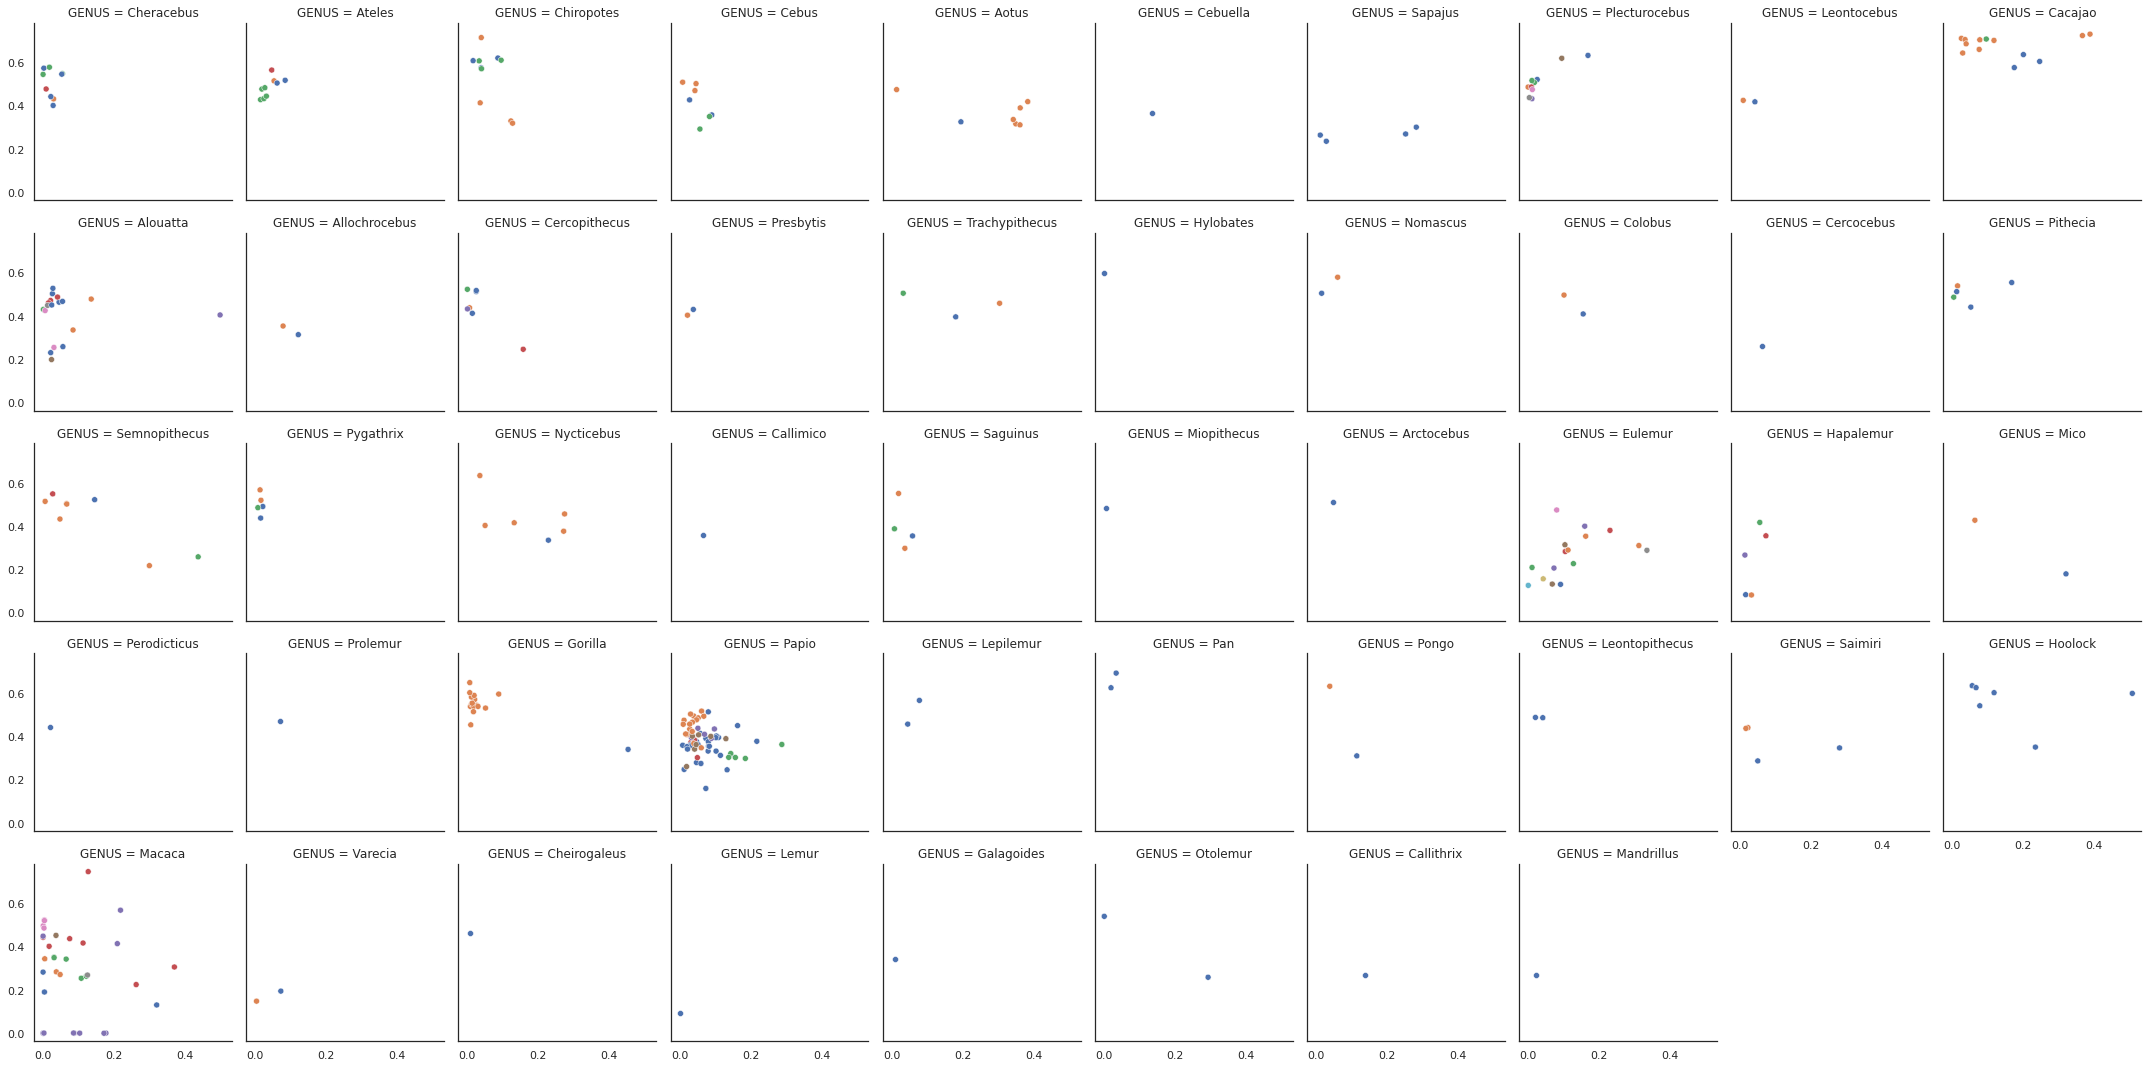

In [6]:
g = sns.FacetGrid(data=total_df, col="GENUS", col_wrap = 10)
g.map_dataframe(sns.scatterplot, x="FROH", y="x_a_ratio", hue="SPECIES")

Distribution without very low individuals.

Text(0.5, 1.0, 'Based on 303 females')

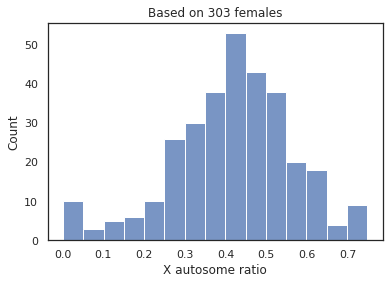

In [7]:
ss = total_df.loc[total_df.x_a_ratio > 0.05]
g = sns.histplot(data=total_df, x="x_a_ratio")
g.set_xlabel("X autosome ratio")
g.set_title("Based on {} females".format(len(ss)))

In [14]:
total_df.loc[total_df.x_a_ratio < 0.1]

,PDGP_ID,aut_het_std,x_het_std,aut_het_mean,x_het_mean,aut_het_median,x_het_median,aut_std,x_std,aut_mean,...,x_q0.2,x_q0.3,x_q0.5,x_q0.7,x_q0.9,GENUS,SPECIES,FROH,x_a_ratio,x_a_ratio_median
73,PD_0157,1015.234073,742.446647,2261.225672,190.896552,2279.0,21.0,3116.799826,2501.892835,9311.882999,...,7.213331,9.025831,11.938403,14.526192,18.523121,Hapalemur,gilberti,0.015360,0.084422,0.009215
74,PD_0158,1128.303050,827.486885,2568.170011,213.268966,2603.0,21.0,2998.396699,2673.176935,10811.292314,...,7.642931,9.485675,12.205245,14.971705,18.568102,Hapalemur,griseus,0.031569,0.083043,0.008068
244,PD_0620,726.948689,511.784417,1421.852707,132.958621,1371.0,9.0,1048.157941,725.774216,2108.367664,...,5.836402,7.536179,10.311479,13.387624,17.922869,Lemur,catta,0.002544,0.093511,0.006565
287,PD_0818,838.499151,7.257293,2468.050738,2.510345,2592.0,0.0,1128.862781,10.872189,3756.801212,...,774.395604,882.348901,1032.527473,1165.178571,1338.461538,Macaca,fascicularis,0.000541,0.001017,0.000000
288,PD_0826,1136.717142,2.383738,658.409842,0.805556,0.0,0.0,2193.387438,3.989491,1471.629373,...,0.000000,0.000000,0.000000,34.758621,3334.344828,Macaca,fascicularis,0.177229,0.001223,NaN
289,PD_0827,1066.996627,1.681206,635.883147,0.447552,0.0,0.0,1772.528536,4.133901,1172.427690,...,0.000000,0.000000,0.000000,102.334375,5643.584375,Macaca,fascicularis,0.171613,0.000704,NaN
290,PD_0828,1260.544593,6.745069,802.040276,1.436620,0.0,0.0,1813.232165,7.996556,1168.458765,...,0.000000,0.000000,0.000000,671.576471,2046.749020,Macaca,fascicularis,0.001692,0.001791,NaN
291,PD_0829,1324.127849,3.297469,860.778462,0.791045,0.0,0.0,1825.220492,4.295223,1198.760385,...,0.000000,0.000000,0.000000,1994.324528,3777.283019,Macaca,fascicularis,0.001759,0.000919,NaN
292,PD_0830,1281.018533,2.935825,825.448236,0.813433,0.0,0.0,1787.766782,4.953612,1163.943001,...,0.000000,0.000000,0.000000,1685.203670,3602.510092,Macaca,fascicularis,0.000000,0.000985,NaN
293,PD_0832,1328.601705,4.729965,905.655093,1.328358,0.0,0.0,1894.090932,10.056191,1304.820988,...,0.000000,0.000000,0.000000,1449.232584,2257.523596,Macaca,fascicularis,0.002436,0.001467,NaN


In [12]:
total_df.loc[total_df.GENUS == "Macaca"]

,PDGP_ID,aut_het_std,x_het_std,aut_het_mean,x_het_mean,aut_het_median,x_het_median,aut_std,x_std,aut_mean,...,x_q0.2,x_q0.3,x_q0.5,x_q0.7,x_q0.9,GENUS,SPECIES,FROH,x_a_ratio,x_a_ratio_median
206,PD_0533,400.071394,78.779931,779.445665,148.986207,740.0,133.0,520.293969,208.811740,1933.611511,...,3.074110,3.778873,4.966903,6.316021,8.410175,Macaca,arctoides,0.003857,0.191144,0.179730
207,PD_0535,387.712183,61.664020,457.026884,59.993103,415.0,48.0,448.331834,96.162869,729.736463,...,1.583515,3.550408,6.917462,10.534544,15.251753,Macaca,arctoides,0.320150,0.131268,0.115663
208,PD_0541,327.683471,124.571580,667.849678,189.931034,655.0,176.0,437.972619,189.669657,1226.959485,...,2.274510,2.716776,3.448620,4.190995,5.428286,Macaca,leonina,0.037354,0.284392,0.268702
209,PD_0542,300.814665,125.640909,643.293828,175.027586,644.0,168.0,371.912174,156.471221,905.778493,...,2.382482,2.868119,3.679420,4.473581,5.747665,Macaca,leonina,0.048046,0.272080,0.260870
210,PD_0543,327.347646,138.247668,734.184021,253.075862,708.0,245.0,737.227505,541.548013,4417.190080,...,1.932227,2.260192,2.797580,3.406093,4.386037,Macaca,leonina,0.004669,0.344704,0.346045
211,PD_0552,512.495064,207.362604,981.115865,336.855172,997.0,316.0,864.594779,557.919955,3863.265808,...,1.852428,2.265068,2.959729,3.556425,4.408423,Macaca,radiata,0.065032,0.343339,0.316951
212,PD_0556,392.237067,194.659864,982.856494,345.903448,993.0,324.0,570.291866,310.196435,1605.691783,...,1.988994,2.324348,2.870743,3.370883,4.157229,Macaca,radiata,0.030993,0.351937,0.326284
213,PD_0557,688.173065,174.833927,910.274517,231.972414,855.0,204.0,853.609428,460.337354,3205.231352,...,2.120942,2.698597,3.685783,4.616928,6.078309,Macaca,radiata,0.107596,0.254838,0.238596
214,PD_0559,413.014347,200.776273,1024.224158,358.531034,1037.0,340.0,776.911375,490.003315,3445.995835,...,1.999827,2.359628,2.892358,3.422298,4.172582,Macaca,radiata,0.031061,0.350051,0.327869
215,PD_0561,529.970378,181.810021,832.498675,219.862069,822.0,197.0,577.870682,211.031493,1359.483908,...,2.051286,2.769918,3.738708,4.707497,6.103827,Macaca,radiata,0.121943,0.264099,0.239659


Checking the low outliers

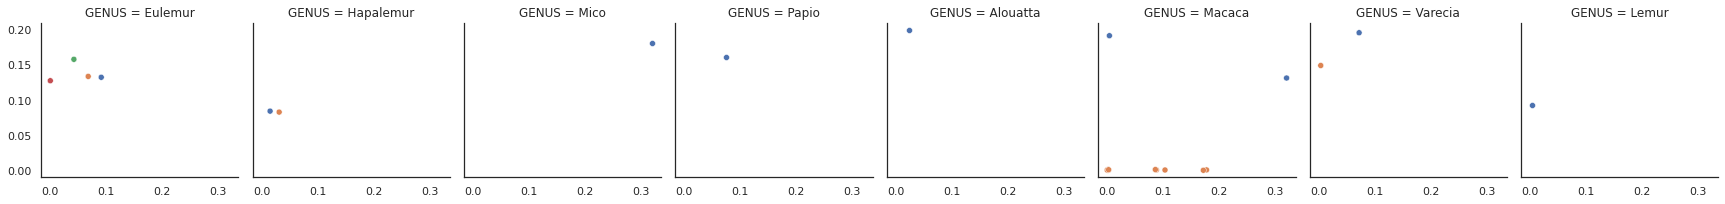

In [8]:
ss = total_df.loc[total_df.x_a_ratio < 0.2]
g = sns.FacetGrid(data=ss, col="GENUS", col_wrap = 10)
g.map_dataframe(sns.scatterplot, x="FROH", y="x_a_ratio", hue="SPECIES")

Additional visualizations inspired by the earlier notebooks (het01/02).

<AxesSubplot:xlabel='aut_het_mean', ylabel='x_a_ratio'>

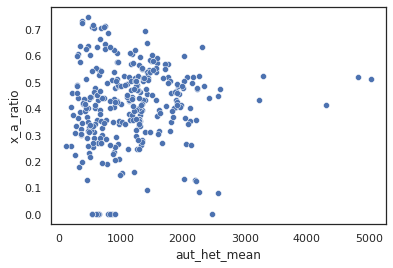

In [20]:
sns.scatterplot(data=total_df, x="aut_het_mean", y="x_a_ratio")

Some quick regressions

In [9]:
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

I am going to see which columns are best at predicting x_a_ratio (excepting the x_het).

In [10]:
total_df.columns

Index(['PDGP_ID', 'aut_het_std', 'x_het_std', 'aut_het_mean', 'x_het_mean',
       'aut_het_median', 'x_het_median', 'aut_std', 'x_std', 'aut_mean',
       'x_mean', 'aut_median', 'x_median', 'aut_cons_windows',
       'x_cons_windows', 'aut_total_windows', 'x_total_windows', 'aut_q0.05',
       'aut_q0.1', 'aut_q0.2', 'aut_q0.3', 'aut_q0.5', 'aut_q0.7', 'aut_q0.9',
       'x_q0.05', 'x_q0.1', 'x_q0.2', 'x_q0.3', 'x_q0.5', 'x_q0.7', 'x_q0.9',
       'GENUS', 'SPECIES', 'FROH', 'x_a_ratio', 'x_a_ratio_median'],
      dtype='object')

In [11]:
# This is simply too many features for this time.
X = total_df[['aut_het_std', 'aut_het_mean', 'aut_het_median', 
                 'aut_std', 'aut_mean', 'aut_median', 'aut_cons_windows',
                 'aut_q0.05', 'aut_q0.1', 'aut_q0.2', 'aut_q0.3', 'aut_q0.5', 'aut_q0.7', 'aut_q0.9',
                 'x_q0.05', 'x_q0.1', 'x_q0.2', 'x_q0.3', 'x_q0.5', 'x_q0.7', 'x_q0.9',
                 'FROH']]
X = total_df[['aut_het_std', 'aut_het_mean', 'aut_het_median',
                 'aut_q0.05', 'aut_q0.1',
                 'x_q0.05',
                 'FROH']]
y = total_df['x_a_ratio']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(lm.score(X,y), lm.coef_)

0.34549757480298326 [-5.05723382e-04  1.46306850e-04  2.31655440e-05 -6.69753377e-02
 -7.54238055e-02 -1.54872778e-03 -1.24553978e-01]


In [12]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.ranking_

array([3, 1, 2, 1, 1, 1, 1])

In [13]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y)
selector.ranking_

array([6, 4, 5, 2, 1, 3, 1])

In [14]:
X = total_df[['aut_het_mean',
              'aut_q0.05', 'aut_q0.1',
               'x_q0.05',
                'FROH']]
y = total_df['x_a_ratio']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(lm.score(X,y), lm.coef_)

0.1930423565490368 [-2.56051534e-05 -6.54025939e-02  4.53543921e-01 -1.49078831e-03
  3.47566926e-01]


Normalization check.

In [15]:
normalized_df=(total_df-total_df.mean())/total_df.std()

In [16]:
X = normalized_df[['aut_het_mean', 'aut_het_median',
                 'aut_q0.05', 'aut_q0.1',
                 'x_q0.05', 'x_q0.1',
                 'FROH']]
y = total_df['x_a_ratio']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(lm.score(X,y), lm.coef_)

0.3088028603937024 [-2.82103383e-01  2.82139734e-01 -7.35570037e-02  8.87751310e-02
  3.92638873e+00 -3.95338742e+00 -3.87331324e-04]
